<a href="https://colab.research.google.com/github/PratapSneh/-Covid-19-Chest-X-ray-Image-Recognition/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have done all my project using google colab. Please open this file in colab.

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "snehpratapsingh"
os.environ['KAGGLE_KEY'] = "3849fc83f86caa713e6ef85443ea0814"

In [2]:
! kaggle datasets download -d pranavraikokte/covid19-image-dataset

 91% 144M/158M [00:00<00:00, 307MB/s]
100% 158M/158M [00:00<00:00, 291MB/s]


In [3]:
#Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /content/kaggle.json'
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [4]:
!unzip covid19-image-dataset.zip

Archive:  covid19-image-dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflating: Covid1

In [5]:
print('Covid Image: ', len(os.listdir('/content/Covid19-dataset/train/Covid')))
print('Normal Image: ', len(os.listdir('/content/Covid19-dataset/train/Normal')))
print('Pneumonia Imae: ', len(os.listdir('/content/Covid19-dataset/train/Viral Pneumonia')))

Covid Image:  111
Normal Image:  70
Pneumonia Imae:  70


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

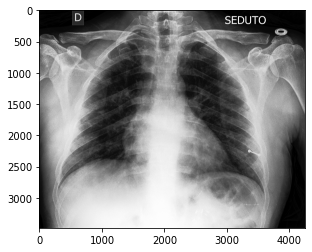

In [7]:
img1 = cv2.imread('Covid19-dataset/train/Covid/01.jpeg')
plt.imshow(img1)

In [8]:
img1.shape

(3480, 4248, 3)

In [9]:
#urls = os.listdir('Covid19-dataset/train/Covid')
#urls

In [10]:
#path = "Covid19-dataset/train/Covid" + urls[0]
#path

In [11]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img/255
    img = cv2.resize(img, (299,299))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [12]:
covid_path = "Covid19-dataset/train/Covid"
covid_url = os.listdir(covid_path)
covid_images, covid_targets = loadImages(covid_path, covid_url, 1)

In [13]:
covid_images.shape

(111, 299, 299, 3)

In [14]:
normal_path = 'Covid19-dataset/train/Normal'
normal_url = os.listdir(normal_path)
normal_images, normal_targets = loadImages(normal_path, normal_url, 0)

In [15]:
normal_images.shape

(70, 299, 299, 3)

In [16]:
len(covid_url), len(covid_images)

(111, 111)

In [17]:
data = np.r_[covid_images, normal_images]
data.shape

(181, 299, 299, 3)

In [18]:
targets = np.r_[covid_targets, normal_targets]
targets.shape

(181,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)


In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [23]:
model = Sequential([
    Conv2D(32,3, input_shape = (299, 299, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
5/5 [==============================] - 13s 256ms/step - loss: 0.8184 - accuracy: 0.4000 - val_loss: 0.6692 - val_accuracy: 0.6087
Epoch 2/5
5/5 [==============================] - 0s 68ms/step - loss: 0.6381 - accuracy: 0.6593 - val_loss: 0.6986 - val_accuracy: 0.5217
Epoch 3/5
5/5 [==============================] - 0s 68ms/step - loss: 0.5930 - accuracy: 0.6519 - val_loss: 0.4719 - val_accuracy: 0.9565
Epoch 4/5
5/5 [==============================] - 0s 69ms/step - loss: 0.3760 - accuracy: 0.9481 - val_loss: 0.1725 - val_accuracy: 0.9783
Epoch 5/5
5/5 [==============================] - 0s 66ms/step - loss: 0.1483 - accuracy: 0.9704 - val_loss: 0.1191 - val_accuracy: 0.9783


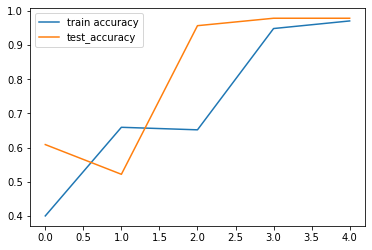

In [27]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

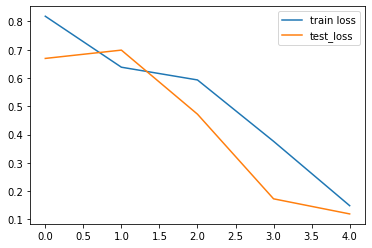

In [28]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [29]:
 img = cv2.imread('/content/Covid19-dataset/test/Normal/0101.jpeg')
 img = cv2.resize(img,(299,299))
 img = np.reshape(img,[-1,299,299,3])
 img = np.array(img)
 res = model.predict(img)
if res == 1:
  print("Patient is having COVID")
else:
  print("Patient is Normal")

1/1 [==============================] - 0s 170ms/step
Patient is Normal
